# CNN IMAGE CLASSIFCATION

A convolutional neural network is a class of deep learning which deals with processing image and video data by extracting features from them and build a neural network by assigning them weights and convolved them with a filter to classify and identify an image.

CNN is a prior choice of every data scientist to deal with any Image or video processing data. Using the transfer learning model and modifying it with our layers is also easy.

### Import Library & Project Dependencies

In [1086]:
import tensorflow as tf # modeule for deep learning ML models
import cv2 # module capable for handling image processing with computer vision
import os # navigate the local machine
import imghdr # defin the type of an image
import numpy as np # used for numerical python  
import warnings # raise warning from the system
import matplotlib.pyplot as plt # graphical presentation of data


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

warnings.filterwarnings('ignore')

In [1087]:

# configure how the library handles GPU memory allocation. 

gpus = tf.config.experimental.list_physical_devices('GPU')

# When 'set_memory_growth' is set to True, TensorFlow will not allocate all available GPU memory upfront 
# but will grow the memory usage as needed by the application. This can be useful to avoid out-of-memory errors and 
#to allow multiple processes to share the same GPU.

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### Data Preparations

In [1088]:
data_dirs = '../data'

img_ext = ['jpeg', 'png', 'jpg', 'bmp', 'gif']


In [1089]:
classes = os.listdir(data_dirs)
classes

['face masks', 'faces']

In [1090]:
os.listdir(os.path.join(data_dirs, 'face masks'))

['-1x-1.jpg',
 '-1x-12.jpg',
 '-surgical-face-mask-3-layer-disposable-anti-dust-anti-pollution-with-earloop.jpg',
 '-wearing-face-mask-outdoors-group-of-young-volunteers-coronavirus-1689113587.jpg',
 '0d6c9c64010e4fa78cfd6e1f612ff539_18.jpeg',
 '1000_F_319382782_sAENVBV2h9EKJS3ddFXdvisykofxVm9E.jpg',
 '106757648-1603404475911-gettyimages-1281710356-nng_6210_2020102252211420.jpeg',
 '1140-mask.jpg',
 '1140-one-way-mask-wearing.jpg',
 '1200x675_cmsv2_d1250a53-41e4-563e-94c6-5d56cb49f51a-4811590.jpg',
 '12484908-72b1-4cc8-80f1-d7b2cdb21aea.jpeg',
 '13Lynteris4-superJumbo.jpg',
 '1405.jpeg',
 '140744_iStock-1383692829.jpg_9fff28a8-4664-44c3-aa4c-0803c42f5038.jpg',
 '158534-fwtzxupkhh-1619956007.jpg',
 '1a1bad51dab5431da041016d68ee7aae-1920.jpeg',
 '1d48f3ed68f5152b6f347b3f92a97284.jpg',
 '200817_mask_1200x533.jpg',
 '201014-stock.jpg',
 '221216-women-wearinig-mask-new-york-al-1112-e86022.jpg',
 '24380.jpg',
 '40001_2020_423_Fig4_HTML.png',
 '8.png',
 '9ff1d8a9-4a30-4fd1-81c2-90ebfd8c4ae1_w

In [1091]:
# Loop over the files and detect if all the images are of exppected image extensions

for img_class in os.listdir('../data'):
    for image_path in os.listdir(os.path.join(data_dirs, img_class)):
        # print(image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path) # check if the images have expected format / exts
            if tip not in img_ext:
                print('The image file has the expected file extension {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Exception raise passed test:  {}'.format(image_path))

Exception raise passed test:  -1x-1.jpg
Exception raise passed test:  -1x-12.jpg
Exception raise passed test:  -surgical-face-mask-3-layer-disposable-anti-dust-anti-pollution-with-earloop.jpg
Exception raise passed test:  -wearing-face-mask-outdoors-group-of-young-volunteers-coronavirus-1689113587.jpg
Exception raise passed test:  0d6c9c64010e4fa78cfd6e1f612ff539_18.jpeg
Exception raise passed test:  1000_F_319382782_sAENVBV2h9EKJS3ddFXdvisykofxVm9E.jpg
Exception raise passed test:  106757648-1603404475911-gettyimages-1281710356-nng_6210_2020102252211420.jpeg
Exception raise passed test:  1140-mask.jpg
Exception raise passed test:  1140-one-way-mask-wearing.jpg
Exception raise passed test:  1200x675_cmsv2_d1250a53-41e4-563e-94c6-5d56cb49f51a-4811590.jpg
Exception raise passed test:  12484908-72b1-4cc8-80f1-d7b2cdb21aea.jpeg
Exception raise passed test:  13Lynteris4-superJumbo.jpg
Exception raise passed test:  1405.jpeg
Exception raise passed test:  140744_iStock-1383692829.jpg_9fff28a8

## Data Processing 

In [1092]:
# keras_data = tf.keras.utils.image_dataset_from_directory(data_dirs) # reads and accesses the Directories containing all files

In [1093]:
keras_data = tf.keras.utils.image_dataset_from_directory(data_dirs, shuffle=True) # reads and accesses the Directories containing all files
# keras_data = keras_data.map(lambda x, y: (x/255, y)) # The data should have a max value of 1 and min value of 0
scaled_iterator = keras_data.as_numpy_iterator() # convert the dataset into a numpy array of data
batch = scaled_iterator.next() # returns a new batch of arrays as they are shuffled with each run
batch

Found 1047 files belonging to 2 classes.


(array([[[[107.96484  ,  78.00195  ,  49.927734 ],
          [139.23438  , 110.234375 ,  80.234375 ],
          [181.20703  , 152.20703  , 121.46484  ],
          ...,
          [161.71094  , 140.04102  , 114.55664  ],
          [174.88477  , 157.55078  , 137.10547  ],
          [220.33008  , 203.33008  , 183.33008  ]],
 
         [[106.61018  ,  76.64729  ,  48.573074 ],
          [158.11131  , 129.11131  ,  98.9839   ],
          [174.20349  , 145.20349  , 113.52913  ],
          ...,
          [163.17401  , 141.03801  , 114.15538  ],
          [172.97797  , 155.07172  , 132.40105  ],
          [214.73483  , 196.06052  , 173.77145  ]],
 
         [[106.14047  ,  76.45404  ,  47.82691  ],
          [177.76831  , 148.70438  , 118.51369  ],
          [164.27406  , 134.75311  , 102.61586  ],
          ...,
          [166.40463  , 142.46396  , 113.96201  ],
          [172.06358  , 152.00694  , 126.588455 ],
          [206.41656  , 184.76813  , 159.89615  ]],
 
         ...,
 
         [[ 

In [1094]:
batch[0].shape # Each batch consists of 32 images to be processed with 256 x 256 x 3 pixels

(32, 256, 256, 3)

In [1095]:
batch[1] # This consists of the image labels
# label 0 - shows the images with face masks
# label 1 - shows the images without face masks

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

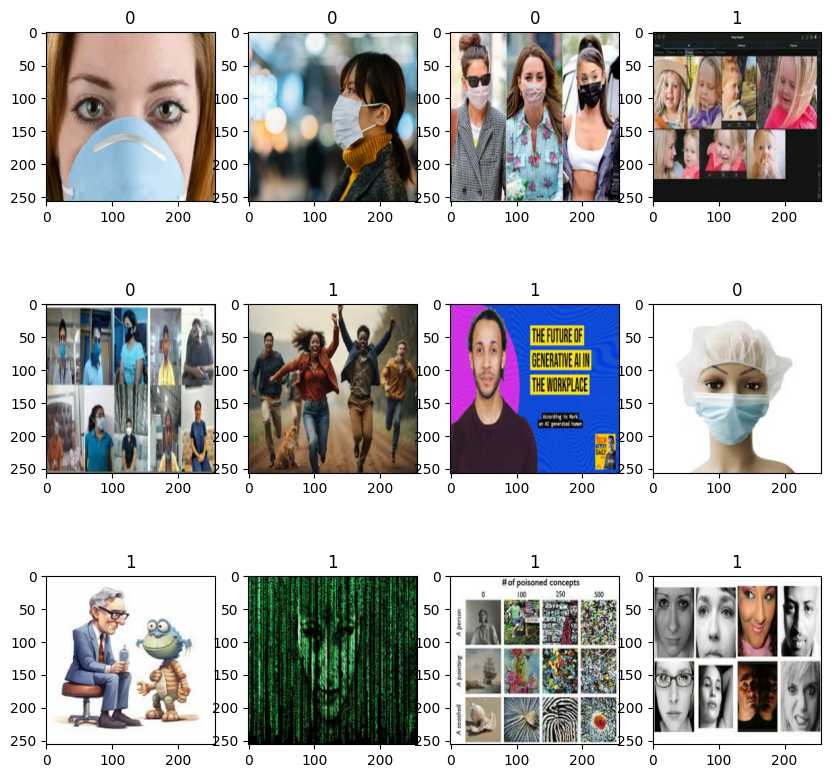

In [1096]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))
ax = ax.flatten()
for idx, image in enumerate(batch[0][:12]):
    ax[idx].imshow(image.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Splitting the Dataset into Training & Testing sets

In [1097]:
# keras_data = keras_data.map(lambda x, y: (x/255, y))

In [1098]:
train_size = int(len(keras_data)*.7) # we assign the training set a 70% size of the whole dataset
val_size = int(len(keras_data)*.2) # we assign 20%
test_size = int(len(keras_data)*.1) # we assign 10%

In [1099]:
# The take method is used to select the first n elements from a dataset
# The skip method is used to skip the first n elements of a dataset.

train = keras_data.take(train_size)
val = keras_data.skip(train_size).take(val_size)
test = keras_data.skip(train_size + val_size).take(test_size)

## ML Model for Deep Learning Algorithm

In [1100]:
model = Sequential()

In [1101]:
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu', input_shape=(256,256,3))) # Extracts 16 feature maps from the input image using 3x3 filters.
model.add(MaxPooling2D()) # Downsamples the feature maps of the convolution layer

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # Converts the 2D feature maps into a 1D vector

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Summary
# The model extracts and downsamples features through three convolutional and max pooling layers.
# The flattened features are passed through a fully connected layer.
# The final layer produces a single output value using the sigmoid activation function, suitable for binary classification.

In [1102]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_70 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_71 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_72 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [1103]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

## Train the Model

In [1104]:
# Create a logs folder that will handle the logins and log files of the project
logs = '../logs'

In [1105]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logs)

 Benefits of callback 
 - Learning Rate: Track changes in learning rate if you are using learning rate schedules.
 - Comparing Runs: TensorBoard allows you to compare different training runs, helping you understand the impact of hyperparameter changes.
 - Scalability: Efficiently manage and compare multiple experiments.
 - Profiling: TensorBoard can help profile the performance of your model, identifying bottlenecks in computation and resource utilization.

In [1106]:

def is_image_file(file_path):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    return any(file_path.lower().endswith(ext) for ext in valid_extensions)

def check_images_in_directory(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if not is_image_file(file_path):
                print(f"Unsupported image file format: {file_path}")
            else:
                try:
                    image = tf.io.read_file(file_path)
                    tf.image.decode_image(image, channels=3)
                except tf.errors.InvalidArgumentError:
                    print(f"Invalid image format for file: {file_path}")
                # os.remove(file_path)
                    

# Path to the directory containing images
directory_path = data_dirs

# Check images in the directory
check_images_in_directory(directory_path)


In [1107]:
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callbacks])

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.5376 - loss: 78.8270 - val_accuracy: 0.6667 - val_loss: 0.6056
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6668 - loss: 0.6086 - val_accuracy: 0.7031 - val_loss: 0.6054
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8068 - loss: 0.4147 - val_accuracy: 0.7917 - val_loss: 0.5802
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8672 - loss: 0.3066 - val_accuracy: 0.8229 - val_loss: 0.3947
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9194 - loss: 0.1944 - val_accuracy: 0.8594 - val_loss: 0.4293
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9583 - loss: 0.1265 - val_accuracy: 0.8802 - val_loss: 0.4487
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9763 - loss: 0.0838 - val_accuracy: 0.8802 - val_loss: 0.4806
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9776 - loss: 0.0612 - val_accuracy: 0.9062 - val_loss

In [1108]:
os.listdir(logs)

['train', 'validation']

In [1109]:
history.history

{'accuracy': [0.55027174949646,
  0.6929348111152649,
  0.820652186870575,
  0.8790760636329651,
  0.9225543737411499,
  0.9633151888847351,
  0.96875,
  0.9741848111152649,
  0.970108687877655,
  0.9755434989929199,
  0.9619565010070801,
  0.9619565010070801,
  0.967391312122345,
  0.9823369383811951,
  0.970108687877655,
  0.9932065010070801,
  0.9945651888847351,
  0.9959239363670349,
  0.9972826242446899,
  0.9972826242446899],
 'loss': [42.065433502197266,
  0.5953525900840759,
  0.4191131591796875,
  0.2905910611152649,
  0.20389698445796967,
  0.1134369894862175,
  0.08154505491256714,
  0.06349070370197296,
  0.08679665625095367,
  0.09384354203939438,
  0.12344818562269211,
  0.11114751547574997,
  0.10160819441080093,
  0.08459703624248505,
  0.07778573781251907,
  0.02862357348203659,
  0.016974855214357376,
  0.010562938638031483,
  0.009535727091133595,
  0.006271842867136002],
 'val_accuracy': [0.6666666865348816,
  0.703125,
  0.7916666865348816,
  0.8229166865348816,
  

## Plot the Performance

Text(0.5, 1.0, 'Model Loss Performance')

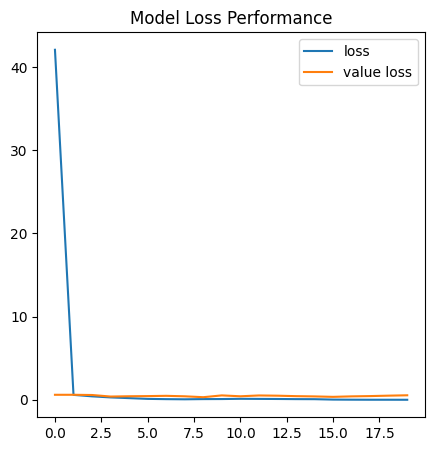

In [1110]:
fig = plt.figure(figsize= (5, 5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='value loss')
plt.legend(loc='upper right')
plt.title('Model Loss Performance')

Text(0.5, 1.0, 'Accuracy Performance of the Model')

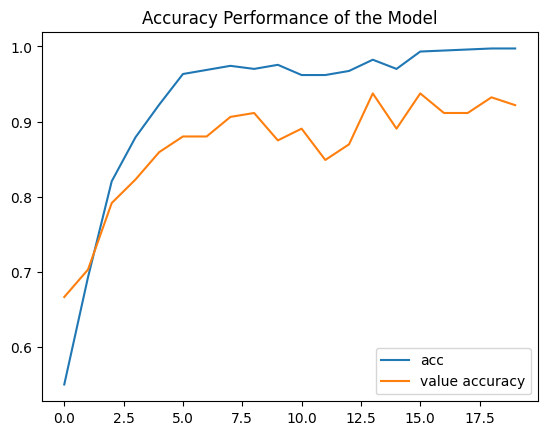

In [1111]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='value accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Performance of the Model')

## Evaluate the Performance

In [1112]:
# Evaluate the metrics performance of the model
prec = Precision()
rec = Recall()
bin_acc = BinaryAccuracy()

In [1113]:
for batch in test.as_numpy_iterator():
    x, y = batch
    y_pred = model.predict(x)
    prec.update_state(y, y_pred)
    rec.update_state(y, y_pred)
    bin_acc.update_state(y, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


In [1114]:
print(f'Precision: {prec.result()}, Recall: {rec.result().numpy()}, Binary Accuracy: {bin_acc.result()}')

Precision: 0.9038461446762085, Recall: 0.9215686321258545, Binary Accuracy: 0.90625


## Manual Testing

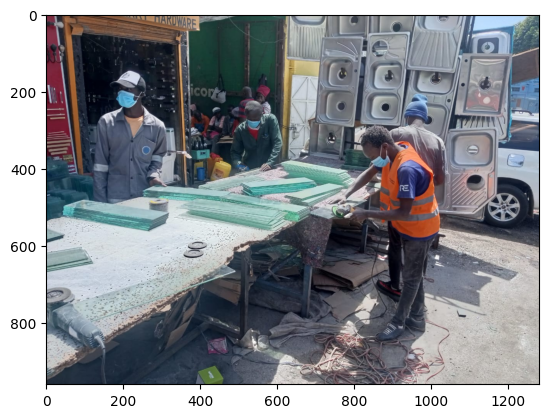

In [1115]:
img_path = cv2.imread(r"D:\Downloads\image3.jpg")
plt.imshow(cv2.cvtColor(img_path, cv2.COLOR_RGB2BGR))

In [1116]:
img_resize = tf.image.resize(img_path, (256, 256))

In [1117]:
# keras_data = keras_data.map(lambda x, y: (x/255, y))
y_pred = model.predict(np.expand_dims(img_resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [1118]:
y_pred[0]

array([0.68012136], dtype=float32)

In [1119]:
if y_pred[0] > 0.5:
    print('The face image has no Face Mask')
else:
    print('The person is wearing a face mask')

The face image has no Face Mask


## Save the Model

In [1120]:
model.save(os.path.join('../model', 'face_mask_detection.h5'), overwrite=True)

### load the model

In [1121]:
new_model = load_model(os.path.join('../model', 'face_mask_detection.h5'))

In [1122]:
new_model_predict = new_model.predict(np.expand_dims(img_resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


In [1123]:
new_model_predict

array([[0.68012136]], dtype=float32)